## Задача 3
Работа с датасетом "house price"
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. 
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('kc_house_data.csv',encoding='cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df = df.drop(columns=['sqft_basement','sqft_above',	'zipcode','lat','long','sqft_living15','sqft_lot15'])
pricehous = df.corr(numeric_only=True)
pricehous = np.round(pricehous,2)
pricehous = np.abs(pricehous)
pricehous

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,1.00,0.02,0.00,0.01,0.01,0.13,0.02,0.00,0.01,0.02,0.01,0.02,0.02
price,0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.05,0.13
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,0.01,0.08,0.03,0.36,0.15,0.02
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,0.12,0.66,0.51,0.05
sqft_living,0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.06,0.76,0.32,0.06
sqft_lot,0.13,0.09,0.03,0.09,0.17,1.00,0.01,0.02,0.07,0.01,0.11,0.05,0.01
floors,0.02,0.26,0.18,0.50,0.35,0.01,1.00,0.02,0.03,0.26,0.46,0.49,0.01
waterfront,0.00,0.27,0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.03,0.09
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.05,0.10
condition,0.02,0.04,0.03,0.12,0.06,0.01,0.26,0.02,0.05,1.00,0.14,0.36,0.06


<Axes: >

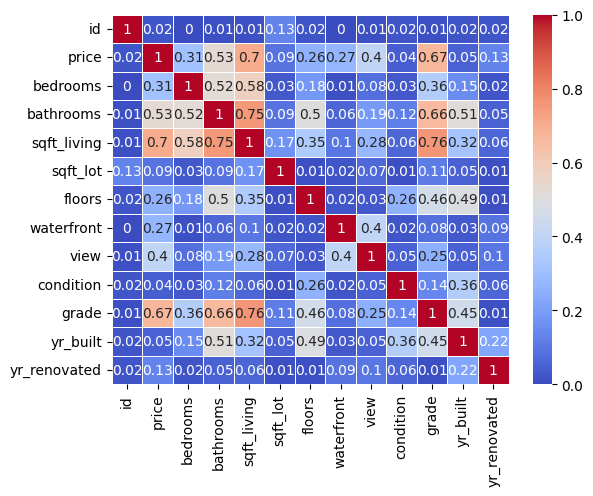

In [6]:
plt.figure()
sns.heatmap(pricehous, annot = True, linewidths=0.5 , cmap='coolwarm')

Благодаря матрице корреляций видно, что больше всего приближены к "price" колонки: "sqft_living", "grade" и "bathrooms". Значми. на цену больше всего влияют жилые квадратные метры, наличие гаража и количество ванных комнат.